In [66]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils_profe
from collections import Counter
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
path = '../../data/vehicles.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.info()

## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [2]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,7222695916,7218891961,7221797935,7222270760,7210384030,7222379453,7221952215,7220195662,7209064557,7219485069
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...,https://hudsonvalley.craigslist.org/cto/d/west...,https://hudsonvalley.craigslist.org/cto/d/west...,https://hudsonvalley.craigslist.org/cto/d/poug...,https://medford.craigslist.org/cto/d/grants-pa...,https://erie.craigslist.org/cto/d/erie-2012-su...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro,hudson valley,hudson valley,hudson valley,medford-ashland,erie
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org,https://hudsonvalley.craigslist.org,https://hudsonvalley.craigslist.org,https://hudsonvalley.craigslist.org,https://medford.craigslist.org,https://erie.craigslist.org
price,6000,11900,21000,1500,4900,1600,1000,15995,5000,3000
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [5]:
utils_profe.generar_diccionario(df)

data_dict = {
    'id': 'int64',
    'url': 'object',
    'region': 'object',
    'region_url': 'object',
    'price': 'int64',
    'year': 'float64',
    'manufacturer': 'object',
    'model': 'object',
    'condition': 'object',
    'cylinders': 'object',
    'fuel': 'object',
    'odometer': 'float64',
    'title_status': 'object',
    'transmission': 'object',
    'VIN': 'object',
    'drive': 'object',
    'size': 'object',
    'type': 'object',
    'paint_color': 'object',
    'image_url': 'object',
    'description': 'object',
    'county': 'float64',
    'state': 'object',
    'lat': 'float64',
    'long': 'float64',
    'posting_date': 'object',
}


In [6]:
# Conertir a los tipos de datos correspondientes segun la info del ds
data_dict = {
    'id': 'int64',
    'url': 'string',
    'region': 'string',
    'region_url': 'string',
    'price': 'int64',
    'year': 'float64',
    'manufacturer': 'string',
    'model': 'string',
    'condition': 'category',
    'cylinders': 'category',
    'fuel': 'category',
    'odometer': 'float64',
    'title_status': 'category',
    'transmission': 'category',
    'VIN': 'string',
    'drive': 'category',
    'size': 'category',
    'type': 'category',
    'paint_color': 'category',
    'image_url': 'string',
    'description': 'string',
    'county': 'float64',
    'state': 'string',
    'lat': 'float64',
    'long': 'float64',
    'posting_date': 'datetime64'
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  int64   
 1   url           426880 non-null  string  
 2   region        426880 non-null  string  
 3   region_url    426880 non-null  string  
 4   price         426880 non-null  int64   
 5   year          425675 non-null  float64 
 6   manufacturer  409234 non-null  string  
 7   model         421603 non-null  string  
 8   condition     252776 non-null  category
 9   cylinders     249202 non-null  category
 10  fuel          423867 non-null  category
 11  odometer      422480 non-null  float64 
 12  title_status  418638 non-null  category
 13  transmission  424324 non-null  category
 14  VIN           265838 non-null  string  
 15  drive         296313 non-null  category
 16  size          120519 non-null  category
 17  type          334022 non-null

In [7]:
# Ver cuales quedaron como object
# Mostrar las columnas tipo 'object'
columnas_object = df.select_dtypes(include='object').columns
print("Columnas de tipo 'object':")
print(columnas_object)

Columnas de tipo 'object':
Index(['posting_date'], dtype='object')


In [8]:
#Empezamos con 'posting_date'
# La columna normalized-losses debe ser numerico pero figura como Object debido a que tiene ?
# Concepto: representa una medida normalizada de las pérdidas asociadas con seguros de automóviles. Se refiere a la cantidad estimada 
# de dinero perdido debido a siniestros en comparación con el valor del vehículo. Esta métrica ayuda a evaluar el riesgo asociado a 
# un automóvil en términos de costos de reparación o reemplazo tras un accidente. Los valores más altos indican mayores pérdidas 
# relativas, mientras que los valores bajos sugieren menores costos en situaciones de siniestro.(chatgpt)
columna = 'posting_date'
df[columna].unique()

array([nan, '2021-05-04T12:31:18-0500', '2021-05-04T12:31:08-0500', ...,
       '2021-04-04T03:21:17-0600', '2021-04-04T03:21:11-0600',
       '2021-04-04T03:21:07-0600'], dtype=object)

In [9]:
utils_profe.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
county,0,426880,100.00
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93


In [10]:
# Elimino county porque es una columna dejada por error segun la doc del dataset
# Las demas porque tienen mas de 20% 
# Eliminar las columnas especificadas
df = df.drop(columns=['county', 'size', 'cylinders', 'condition', 'VIN', 'drive', 'paint_color', 'type'])


In [11]:
# Eliminar registros donde 'model' es nulo
df = df.dropna(subset=['model'])


In [12]:
# Agrupar por 'model' y obtener el valor más frecuente de 'manufacturer'
manufacturer_mode = df.groupby('model')['manufacturer'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Imputar los valores nulos en 'manufacturer' con el valor más frecuente por modelo
df['manufacturer'] = df.apply(lambda row: manufacturer_mode[row['model']] if pd.isnull(row['manufacturer']) else row['manufacturer'], axis=1)



In [13]:
# Imputar 'generico' a los valores nulos de 'manufacturer'
df['manufacturer'] = df['manufacturer'].fillna('generico')


In [14]:
# Imputar 'title_status' a los valores nulos de 'missing'
df['title_status'] = df['title_status'].fillna('missing')

In [15]:
# Imputar 'long' a los valores nulos de 0
df['long'] = df['long'].fillna(0)
df['lat'] = df['lat'].fillna(0)
df['odometer'] = df['odometer'].fillna(0)

In [16]:
df['transmission'] .unique()

['other', 'automatic', 'manual', NaN]
Categories (3, object): ['automatic', 'manual', 'other']

In [17]:
# Primero, verificar si hay algún valor nulo en 'fuel'
df['fuel'] = df.groupby('model')['fuel'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'other'))



In [18]:
# Imputar valores nulos en 'transmission' según el valor más frecuente de 'model'
df['transmission'] = df.groupby('model')['transmission'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'other'))


In [19]:
df = df.dropna(subset=['year'])


In [20]:
df['description'].fillna('No description', inplace=True)


C:\Users\edgar\AppData\Local\Temp\ipykernel_8636\3972092624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('No description', inplace=True)


In [21]:
utils_profe.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
id,420466,0,0.0
url,420466,0,0.0
region,420466,0,0.0
region_url,420466,0,0.0
price,420466,0,0.0
year,420466,0,0.0
manufacturer,420466,0,0.0
model,420466,0,0.0
fuel,420466,0,0.0
odometer,420466,0,0.0


### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [22]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **Consistencia en valores categóricos**

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’)

In [23]:
#df['region'] = df['region'].astype('str')
#df['region_url'] = df['region_url'].astype('str')
#df['manufacturer'] = df['manufacturer'].astype('str')
#df['state'] = df['state'].astype('str')



In [24]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3,4,5
fuel,gas,other,diesel,hybrid,electric,None
title_status,clean,rebuilt,lien,missing,salvage,parts only
transmission,other,automatic,manual,None,None,None


In [37]:
df['manufacturer'] = df['manufacturer'].astype('string')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420466 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            420466 non-null  int64   
 1   url           420466 non-null  string  
 2   region        420466 non-null  string  
 3   region_url    420466 non-null  string  
 4   price         420466 non-null  int64   
 5   year          420466 non-null  float64 
 6   manufacturer  420466 non-null  string  
 7   model         420466 non-null  string  
 8   fuel          420466 non-null  category
 9   odometer      420466 non-null  float64 
 10  title_status  420466 non-null  category
 11  transmission  420466 non-null  category
 12  image_url     420466 non-null  string  
 13  description   420466 non-null  string  
 14  state         420466 non-null  string  
 15  lat           420466 non-null  float64 
 16  long          420466 non-null  float64 
 17  posting_date  420466 non-null  ob

In [40]:
# Seleccion de columnas importantes
df= df[['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'transmission']]


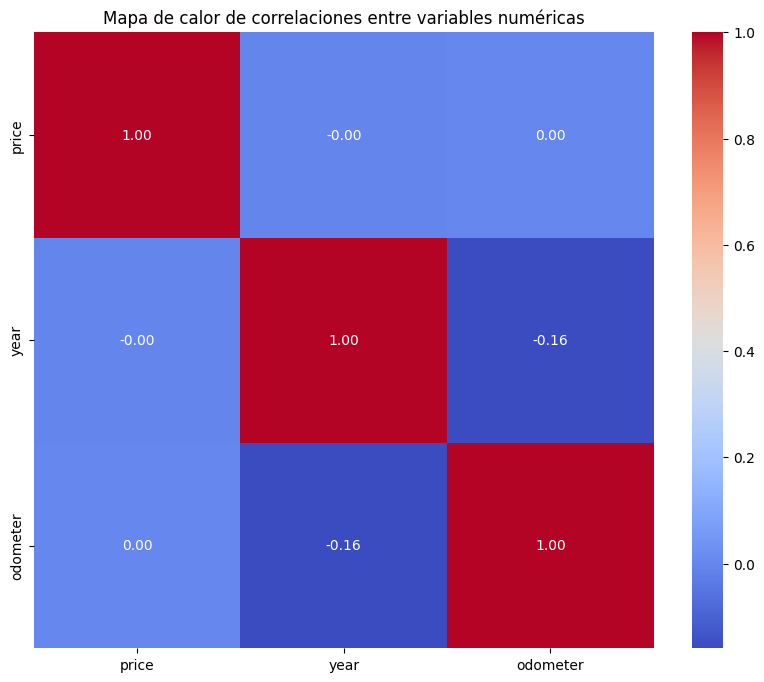

In [41]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_columns].corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

In [56]:
import pandas as pd

# Suponiendo que df es tu DataFrame
X = df[numerical_columns]  # Las características (todo excepto 'target')
y = df['price']  # El objetivo

print(X.shape)  # Dimensiones de X
print(X.columns)  # Nombres de las columnas de X
print(X.head())  # Primeras filas de X


(420466, 3)
Index(['price', 'year', 'odometer'], dtype='object')
    price    year  odometer
27  33590  2014.0   57923.0
28  22590  2010.0   71229.0
29  39590  2020.0   19160.0
30  30990  2017.0   41124.0
31  15000  2013.0  128000.0


              price           year      odometer
count  4.204660e+05  420466.000000  4.204660e+05
mean   6.105326e+04    2011.374827  9.666161e+04
std    1.102377e+07       9.131212  2.038746e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.950000e+03    2008.000000  3.665100e+04
50%    1.397700e+04    2014.000000  8.474550e+04
75%    2.600300e+04    2017.000000  1.330000e+05
max    3.736929e+09    2022.000000  1.000000e+07


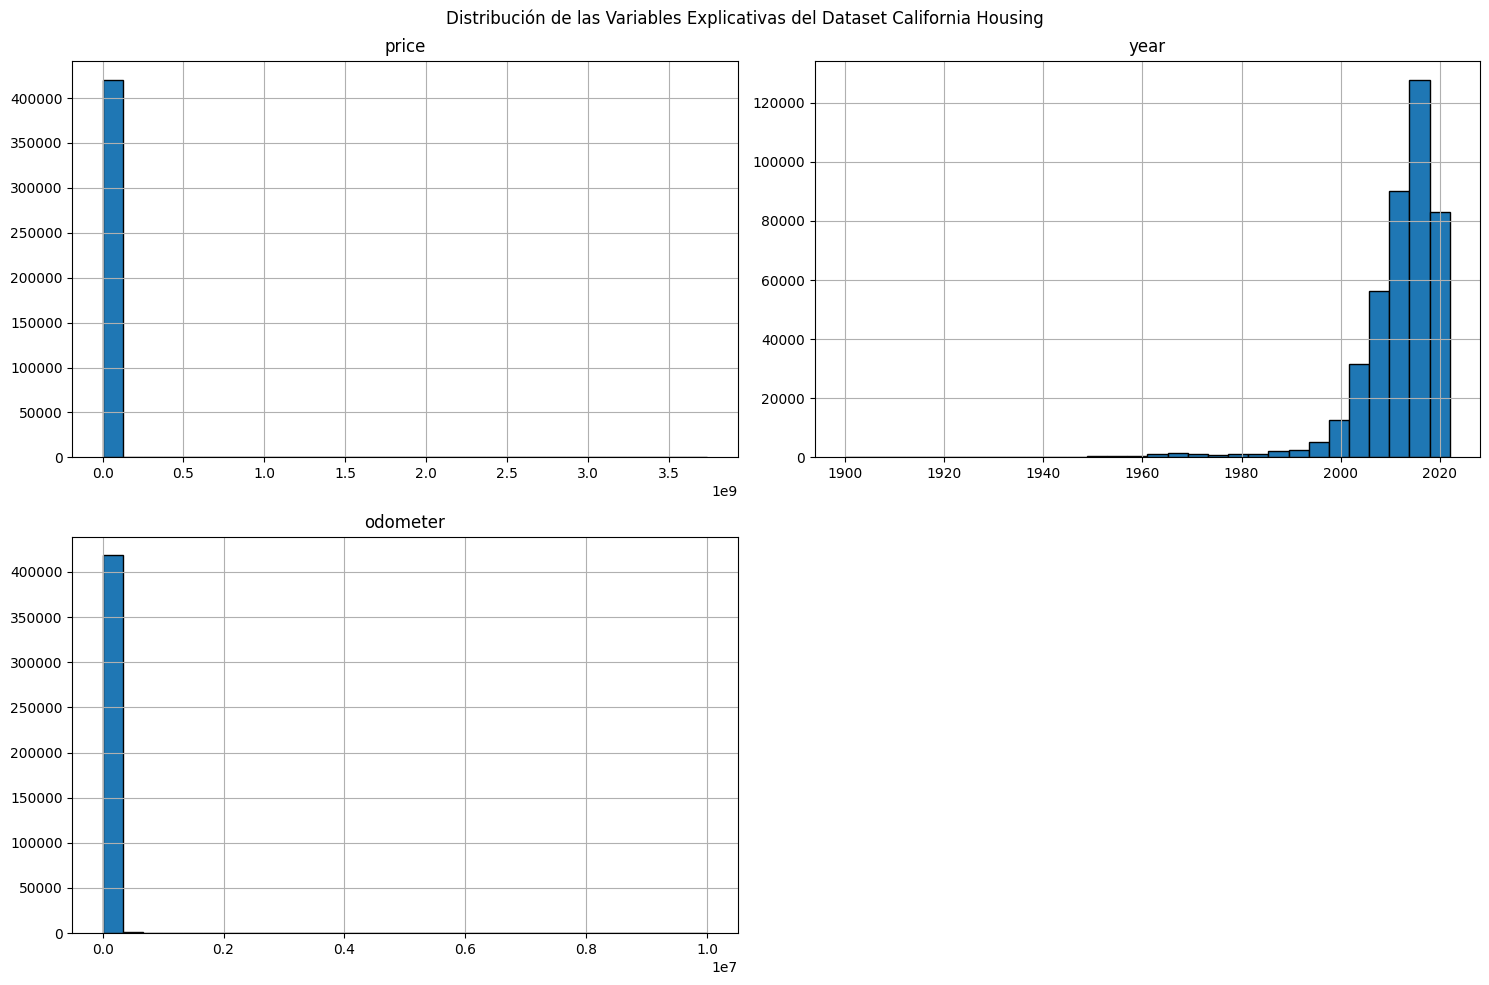

In [57]:
print(X.describe())
# Crear histogramas para cada característica
X.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()

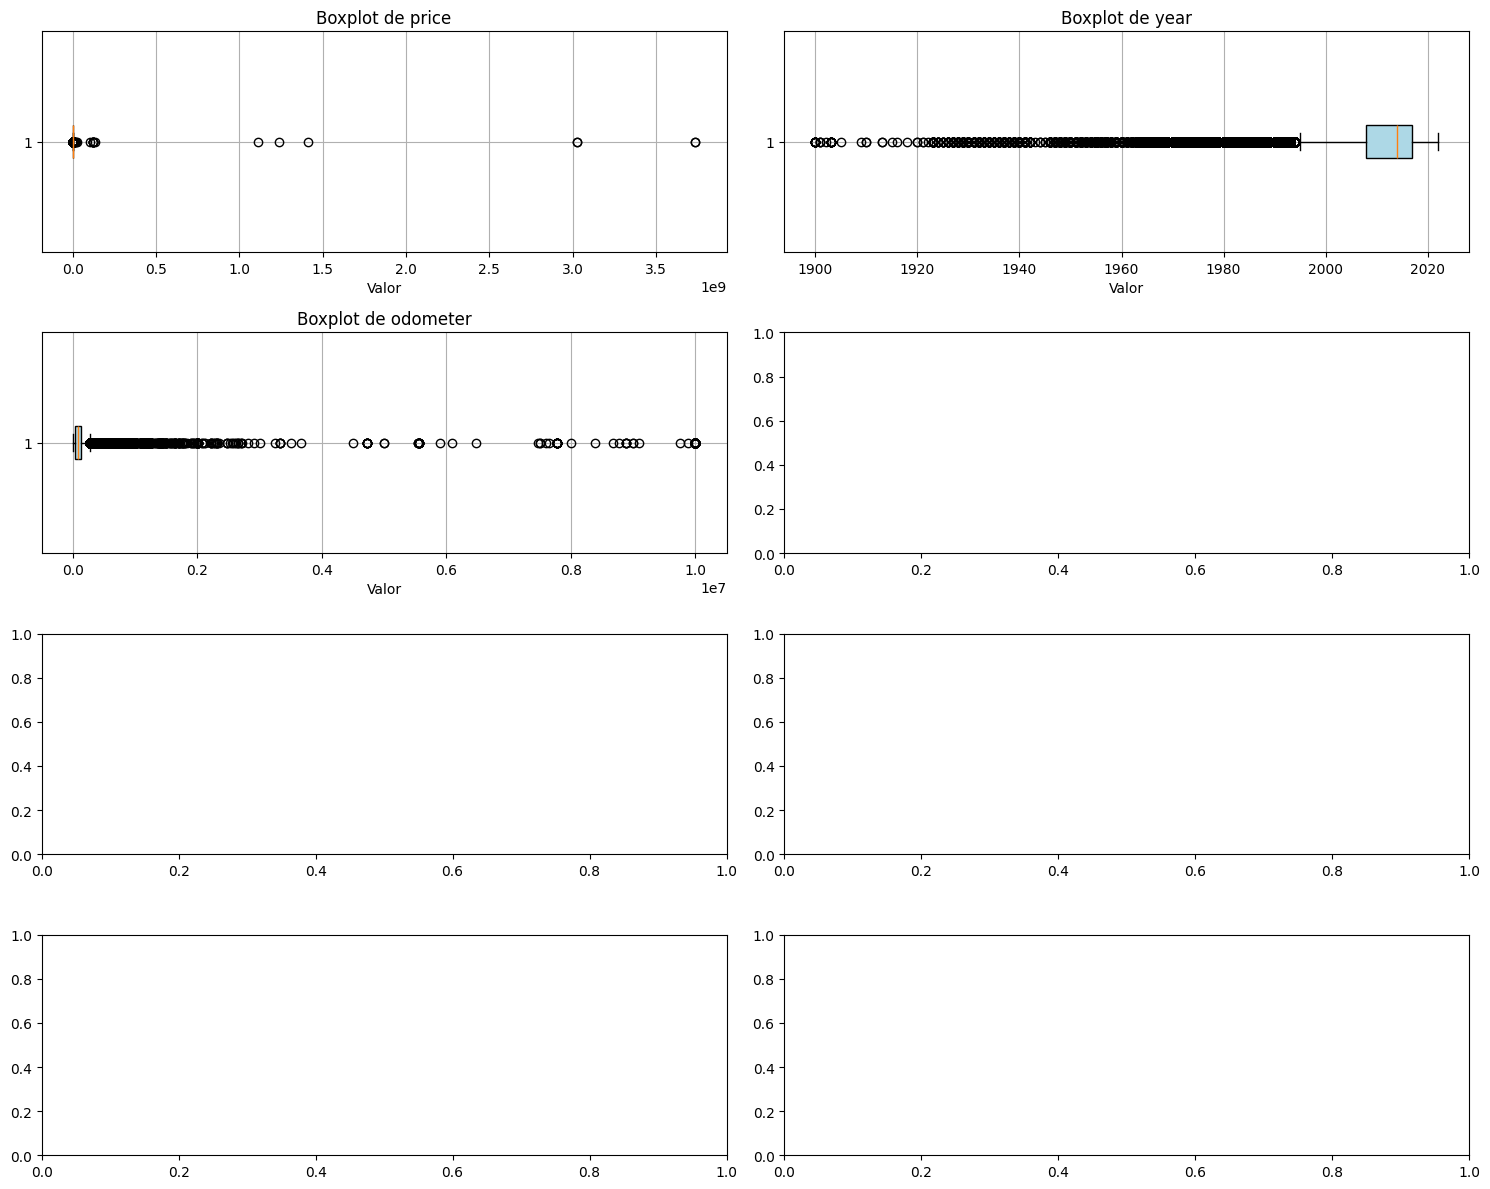

In [58]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(X.columns):
    axes[i].boxplot(X[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

* Transformación de variables categóricas.
* División del conjunto de datos en entrenamiento y prueba.
* Escalado de características.

Error Cuadrático Medio (MSE): 11365489758213.63
Coeficiente de Determinación (R²): 0.91
Error Absoluto medio (MAE): 16118.83


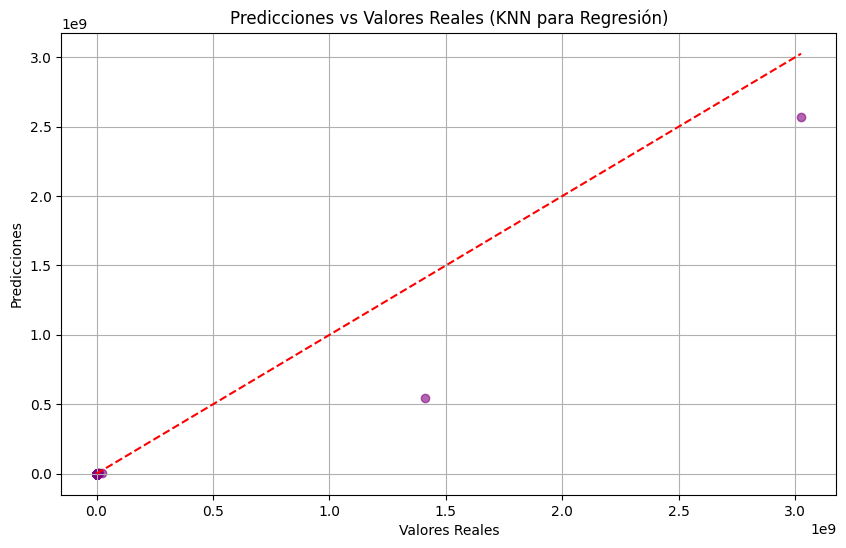

In [65]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos con StandardScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo KNN para regresión con K=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Ajustar el modelo a los datos escalados
knn_regressor.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_regressor.predict(X_test_scaled)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Error Absoluto medio (MAE): {mae:.2f}")


# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (KNN para Regresión)')
plt.grid()
plt.show()

In [45]:
numeric_features = ['price', 'year', 'odometer']
categorical_features = ['manufacturer', 'model', 'fuel']

In [46]:
# Separar variables predictoras y objetivo
selected_features = numeric_features + categorical_features
X = df[selected_features]
y = df['price']

In [47]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Crear el preprocesador con OneHotEncoder para características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Mantiene las columnas numéricas sin cambios
)

In [49]:
# Aplicar el preprocesamiento al conjunto de entrenamiento y prueba
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [51]:
# Escalado de datos
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [67]:
# Modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Modelo de Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression - R²:", r2_score(y_test, y_pred_lr))

print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))


Linear Regression - MSE: 1.9127624874751865e-13
Linear Regression - R²: 1.0
Random Forest - MSE: 1837689699380.6033
Random Forest - R²: 0.9861263299990725


Creo que es necesario revisar el proceso pues hay señal de sobreajuste.
Los criterios de eliminar columnas no fue muy buena idea aparentemente o tal vez hacer Feature Engineering con marcas y modelos.


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear el modelo
rf = RandomForestRegressor()

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el modelo optimizado
y_pred = grid_search.predict(X_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
